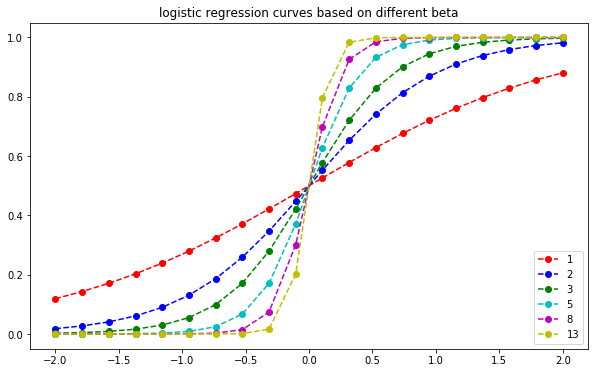

In [17]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0) 

x = np.linspace(-2, 2, num=20)
beta_choice = np.array([1, 2, 3, 5, 8, 13])
colors = np.array(['r', 'b', 'g', 'c', 'm', 'y'])
for i in np.arange(beta_choice.size):
    beta = beta_choice[i]
    plt.plot(x, 1 / (1 + np.exp(-x*beta)), marker='o', linestyle='--', color = colors[i], label=beta)
    
plt.legend(loc='lower right')
plt.title("logistic regression curves based on different beta")
plt.show()

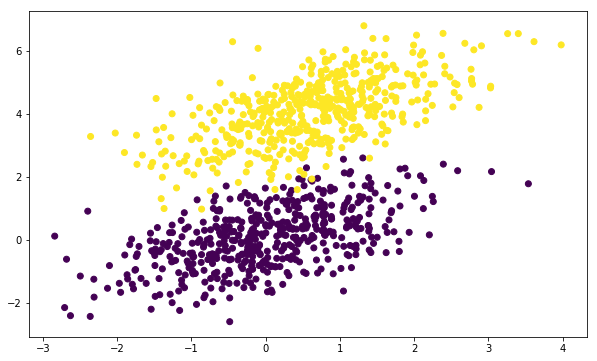

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0) 

np.random.seed(3)
num_pos = 500

# Bivariate normal distribution mean [0, 0] [0.5, 4], with a covariance matrix
subset1 = np.random.multivariate_normal([0, 0], [[1, 0.6],[0.6, 1]], num_pos)
subset2 = np.random.multivariate_normal([0.5, 4], [[1, 0.6],[0.6, 1]], num_pos)

dataset = np.vstack((subset1, subset2))
labels = np.hstack((np.zeros(num_pos), np.ones(num_pos)))

plt.scatter(dataset[:, 0], dataset[:, 1], c=labels)
plt.show()

scikit-learn is a simple machine Learning in Python.

In [2]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()
clf.fit(dataset, labels)
print(clf.intercept_, clf.coef_, clf.classes_)

[-5.7268742] [[-1.43492343  3.15471817]] [ 0.  1.]


After the model fitting, we can then use the model to prediction. Example below shows that it predict P(label=0)=0.9978 for [0, 0], and P(label=1)=0.9961 for [1, 4].

In [3]:
clf.predict_proba([[0, 0], [1, 4]])

array([[ 0.99675333,  0.00324667],
       [ 0.00424789,  0.99575211]])

We can systemaitcally plot classification and its prediction boundary using the function below.

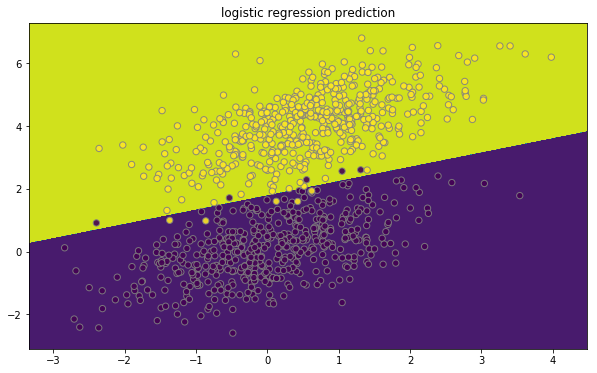

In [4]:
# it is a frequently used plot function for classification
def plot_decision_boundary(pred_func, X, y, title):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # print(Z)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolors="grey", alpha=0.9)
    plt.title(title)
    plt.show()

# run on the training dataset with predict function
plot_decision_boundary(lambda x: clf.predict(x), dataset, labels, "logistic regression prediction")

In [5]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(3)
num_pos = 5000
learning_rate = 0.0001
iterations = 50000

# Bivariate normal distribution mean [0, 0] [0.5, 4], with a covariance matrix
subset1 = np.random.multivariate_normal([0, 0], [[1, 0.6],[0.6, 1]], num_pos)
subset2 = np.random.multivariate_normal([0.5, 4], [[1, 0.6],[0.6, 1]], num_pos)

dataset = np.vstack((subset1, subset2))
x = np.hstack((np.ones(num_pos*2).reshape(num_pos*2, 1), dataset)) # add 1 for beta_0 intercept
label = np.hstack((np.zeros(num_pos), np.ones(num_pos)))
y = label.reshape(num_pos*2, 1) # reshape y to make 2D shape (n, 1)
beta = np.zeros(x.shape[1]).reshape(x.shape[1], 1)

for step in np.arange(iterations):
    x_beta = np.dot(x, beta)
    y_hat = 1 / (1 + np.exp(-x_beta))
    likelihood = np.sum(np.log(1 - y_hat)) + np.dot(y.T, x_beta)
    preds = np.round( y_hat )
    accuracy = np.sum(preds == y)*1.00/len(preds)
    gradient = np.dot(np.transpose(x), y - y_hat)
    beta = beta + learning_rate*gradient
    if( step % 5000 == 0):
        print("After step {}, likelihood: {}; accuracy: {}".format(step+1, likelihood, accuracy))
    

print(beta)

# compare to sklearn
from sklearn import linear_model
# Logistic regression class in sklearn comes with L1 and L2 regularization, 
# C is 1/lambda; setting large C to make the lamda extremely small 
clf = linear_model.LogisticRegression(C = 100000000, penalty="l2")
clf.fit(dataset, label)
print(clf.intercept_, clf.coef_)

After step 1, likelihood: [[-6931.4718056]]; accuracy: 0.5
After step 5001, likelihood: [[-309.43671144]]; accuracy: 0.9892
After step 10001, likelihood: [[-308.96007441]]; accuracy: 0.9893
After step 15001, likelihood: [[-308.94742145]]; accuracy: 0.9893
After step 20001, likelihood: [[-308.94702925]]; accuracy: 0.9893
After step 25001, likelihood: [[-308.94702533]]; accuracy: 0.9893
After step 30001, likelihood: [[-308.94702849]]; accuracy: 0.9893
After step 35001, likelihood: [[-308.94701465]]; accuracy: 0.9893
After step 40001, likelihood: [[-308.94701912]]; accuracy: 0.9893
After step 45001, likelihood: [[-308.94702355]]; accuracy: 0.9893
[[-10.20181874]
 [ -2.64493647]
 [  5.4294686 ]]
[-10.17937262] [[-2.63894088  5.41747923]]
